## Metódos Quantitativos

O objetivo desse trabalho é examinar a estrutura e configuração dos dados, além de aprender sobre o relacionamento entre as variáveis da base de dados.

A $\textit{Análise Exploratória de Dados}$ inclui um conjunto de ferramentas descritivas e gráficas para a buscar padrões e tendências que desempenharam o papel de hipóteses para uma análise completa.

Empregando técnicas $\textit{estatísticas descritivas e gráficas}$ para estudar o conjunto de dados, detectando $\textit{outliers e anomalias}$, e $\textit{comunicando de forma eficaz os resultados do modelo.}$

In [3]:
import pandas as pd
import requests
import statsmodels.api as sm
import urllib
from urllib import request, response, error, parse 
from urllib.request import urlopen
from bs4 import BeautifulSoup, element

### 1. Extraíndo os Dados.

In [4]:
req = requests.get('https://projects.fivethirtyeight.com/global-club-soccer-rankings/')
if req.status_code == 200:
    print ('Requisição bem sucedida!')


Requisição bem sucedida!


In [5]:
url = "https://projects.fivethirtyeight.com/global-club-soccer-rankings/"
html = urlopen(url)
soup = BeautifulSoup(html,"lxml")
title = soup.title
titleText = title.get_text()
print(titleText)

Global Club Soccer Rankings | FiveThirtyEight


In [6]:
table = soup.find('table', {'class':'all-teams'})

In [7]:
table_str = str(table)

In [8]:
df = pd.read_html(table_str)[0]
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                  Rank      1-week change               team   
0                    1                NaN          Man. City   
1                    2                NaN      Bayern Munich   
2                    3                NaN          Liverpool   
3                    4                NaN          Barcelona   
4                    5                NaN        Real Madrid   
5                    6                NaN                PSG   
6                    7                NaN         RB Leipzig   
7                    8                NaN        Man. United   
8                    9                NaN            Chelsea   
9                   10                NaN           Dortmund   
10                  11                NaN           Juventus   
11                  12                NaN    Atlético Madrid   
12                  13                NaN         Leverkusen   
13                  14                NaN           Atalanta   
14                  15                NaN          Leicester   
15                  16                NaN             Getafe   
16                  17                NaN             Wolves   
17                  18                NaN            Sevilla   
18                  19                NaN        Inter Milan   
19                  20                NaN            Everton   
20                  21                NaN      Real Sociedad   
21                  22                NaN            Arsenal   
22                  23                NaN              Zenit   
23                  24                NaN          Tottenham   
24                  25                NaN               Ajax   
25                  26                NaN              Lazio   
26                  27                NaN           Gladbach   
27                  28                NaN               Roma   
28                  29                NaN        RB Salzburg   
29                  30                NaN             Napoli   
..                 ...                ...                ...   
599                600                NaN    Tranmere Rovers   
600                601                NaN    NY Red Bulls II   
601                602                NaN       Stellenbosch   
602                603                NaN          Port Vale   
603                604                NaN      Bradford City   
604                605                NaN           FC Tulsa   
605                606                NaN  Hartford Athletic   
606                607                NaN     Black Leopards   
607                608                NaN     Mansfield Town   
608                609                NaN     Loudoun United   
609                610                NaN    Oldham Athletic   
610                611                NaN    Southend United   
611                612                NaN   Las Vegas Lights   
612                613                NaN         Scunthorpe   
613                614                NaN       Forest Green   
614                615                NaN            Walsall   
615                616                NaN    Tacoma Defiance   
616                617                NaN             Bolton   
617                618                NaN      Leyton Orient   
618                619                NaN       Grimsby Town   
619                620                NaN          RGV Toros   
620                621                NaN    Carlisle United   
621                622                NaN     Newport County   
622                623                NaN   Atlanta United 2   
623                624                NaN     Sporting KC II   
624                625                NaN    Philadelphia II   
625                626                NaN       Macclesfield   
626                627                NaN          Cambridge   
627                628                NaN          Stevenage   
628                629              

Utilizamos a biblioteca $\textit{BeautifulSoup}$ para análise dos dados HTML e XML extraídos do website. Porém, para fazermos isso, é necessário a utilização da ferramenta $\textit{urllib}$ que faz a conexão com a pagína web.
Pela $\textit{urllib}$  também é feita a verificação da conexão com a pagína web.

Criamos o objeto $\textit{BeautifulSoup}$, onde, 'lxml' é o analisador de html.
Usando a ferramenta $\textit{Inspecionar}$ do navegador procuramos pela tag 'table' e sua classe 'all-teams', e usando o $\textit{BeautifulSoup}$ extraimos a tabela.

### 2. Outro formato para ler os dados.
Quando o banco de dados é disponibilizado, podemos fazer o download dos dados e ler o arquivo csv diretamente.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm 
import statistics as stats
import math


In [13]:
Dados = pd.read_csv('spiglobalrankings.csv')
Dados.head(20)

,rank,prev_rank,name,league,off,def,spi
0,1,1,Manchester City,Barclays Premier League,3.16,0.21,94.80
1,2,2,Bayern Munich,German Bundesliga,3.50,0.38,94.44
2,3,3,Liverpool,Barclays Premier League,2.87,0.31,91.91
3,4,4,Barcelona,Spanish Primera Division,2.90,0.43,90.33
4,5,5,Real Madrid,Spanish Primera Division,2.67,0.37,89.49
5,6,6,Paris Saint-Germain,French Ligue 1,3.19,0.65,89.15
6,7,7,RB Leipzig,German Bundesliga,2.57,0.40,88.09
7,8,8,Manchester United,Barclays Premier League,2.38,0.40,86.23
8,9,9,Chelsea,Barclays Premier League,2.44,0.47,85.54
9,10,10,Borussia Dortmund,German Bundesliga,2.58,0.56,85.38


In [14]:
Dados.isnull().sum()

rank         0
prev_rank    0
name         0
league       0
off          0
def          0
spi          0
dtype: int64

Podemos observar que obtemos uma tabela sem a coluna dos países, porém nessa segunda tabela os dados já estão tratados pois não observamos dados faltantes NaN, confirmado pelo método isnull(). Logo iremos utliza-lá.

### 3. Tratamento de dados:

Para que seja melhor a interação com os dados, é necessário o tratamento e a limpeza adequada. 

In [15]:
dados = Dados.rename(columns={"rank": "Rank", "prev_rank": "Variação Semanal", "name": "Time", "league": "Liga", "off": "Rating Ofensivo", "def": "Rating Defensivo", "spi": "Rating de Força Futebolística"})

In [16]:
dados.head(10)

,Rank,Variação Semanal,Time,Liga,Rating Ofensivo,Rating Defensivo,Rating de Força Futebolística
0,1,1,Manchester City,Barclays Premier League,3.16,0.21,94.80
1,2,2,Bayern Munich,German Bundesliga,3.50,0.38,94.44
2,3,3,Liverpool,Barclays Premier League,2.87,0.31,91.91
3,4,4,Barcelona,Spanish Primera Division,2.90,0.43,90.33
4,5,5,Real Madrid,Spanish Primera Division,2.67,0.37,89.49
5,6,6,Paris Saint-Germain,French Ligue 1,3.19,0.65,89.15
6,7,7,RB Leipzig,German Bundesliga,2.57,0.40,88.09
7,8,8,Manchester United,Barclays Premier League,2.38,0.40,86.23
8,9,9,Chelsea,Barclays Premier League,2.44,0.47,85.54
9,10,10,Borussia Dortmund,German Bundesliga,2.58,0.56,85.38


In [17]:
print(dados.shape)

(629, 7)


In [18]:
dados.describe()

,Rank,Variação Semanal,Rating Ofensivo,Rating Defensivo,Rating de Força Futebolística
count,629.00000,629.00000,629.000000,629.000000,629.000000
mean,315.00000,315.00000,1.226184,1.432544,41.420397
std,181.72094,181.72094,0.499345,0.445965,18.661617
min,1.00000,1.00000,0.200000,0.210000,5.850000
25%,158.00000,158.00000,0.870000,1.130000,27.560000
50%,315.00000,315.00000,1.190000,1.430000,39.430000
75%,472.00000,472.00000,1.530000,1.740000,54.920000
max,629.00000,629.00000,3.500000,2.640000,94.800000


In [19]:
dados.dtypes

Rank                               int64
Variação Semanal                   int64
Time                              object
Liga                              object
Rating Ofensivo                  float64
Rating Defensivo                 float64
Rating de Força Futebolística    float64
dtype: object

### 4. Descrevendo os Dados estatísticamente:

Após ler a base de dados, vamos descrever algumas técnicas estatísticas. 

In [20]:
qualitativa = ['Time', 'Liga']
discreta = ['Rank', 'Variação Semanal']
continua = dados.columns[4:]

$\textit{Tabela de Frequência para Variáveis Discretas:}$  

In [21]:
tab_freq_liga = dados.Liga.value_counts(sort=True)
tab_freq_liga = pd.DataFrame({"Freq.": tab_freq_liga})

tab_freq_liga['Acum.'] = tab_freq_liga['Freq.'].cumsum()
tab_freq_liga['Rel. (%)'] = ((tab_freq_liga['Freq.']/629)*100)
tab_freq_liga['Rel. Acum. (%)'] = tab_freq_liga['Rel. (%)'].cumsum()

tab_freq_liga

,Freq.,Acum.,Rel. (%),Rel. Acum. (%)
United Soccer League,35,35,5.564388,5.564388
Major League Soccer,26,61,4.133545,9.697933
Argentina Primera Division,24,85,3.815580,13.513514
English League Two,24,109,3.815580,17.329094
English League Championship,24,133,3.815580,21.144674
English League One,23,156,3.656598,24.801272
Spanish Segunda Division,22,178,3.497615,28.298887
Brasileiro Série A,20,198,3.179650,31.478537
Italy Serie A,20,218,3.179650,34.658188
French Ligue 1,20,238,3.179650,37.837838


In [22]:
tab_freq_liga.dtypes

Freq.               int64
Acum.               int64
Rel. (%)          float64
Rel. Acum. (%)    float64
dtype: object

$\textit{Tabela de Frequência para Variáveis Contínuas:}$

In [23]:
spi = dados['Rating de Força Futebolística']
bins_range = range(0, int(round(spi.max()))+10,10)
tab_freq_spi = pd.cut(spi, bins=bins_range, include_lowest=True, right=False)
tab_freq_spi = tab_freq_spi.value_counts(sort=False)

tab_freq_spi = pd.DataFrame({"Freq.": tab_freq_spi})
tab_freq_spi['Acum.'] = tab_freq_spi['Freq.'].cumsum()
tab_freq_spi['Rel. (%)'] = ((tab_freq_spi['Freq.']/tab_freq_spi['Freq.'].sum())*100)
tab_freq_spi['Rel. Acum. (%)'] = tab_freq_spi['Rel. (%)'].cumsum()

tab_freq_spi

,Freq.,Acum.,Rel. (%),Rel. Acum. (%)
"[0, 10)",15,15,2.384738,2.384738
"[10, 20)",63,78,10.015898,12.400636
"[20, 30)",118,196,18.759936,31.160572
"[30, 40)",124,320,19.713831,50.874404
"[40, 50)",117,437,18.600954,69.475358
"[50, 60)",75,512,11.923688,81.399046
"[60, 70)",65,577,10.333863,91.732909
"[70, 80)",34,611,5.405405,97.138315
"[80, 90)",14,625,2.225755,99.364070
"[90, 100)",4,629,0.635930,100.000000


In [24]:
tab_freq_spi.dtypes

Freq.               int64
Acum.               int64
Rel. (%)          float64
Rel. Acum. (%)    float64
dtype: object

In [25]:
dados[continua].describe()

,Rating Ofensivo,Rating Defensivo,Rating de Força Futebolística
count,629.000000,629.000000,629.000000
mean,1.226184,1.432544,41.420397
std,0.499345,0.445965,18.661617
min,0.200000,0.210000,5.850000
25%,0.870000,1.130000,27.560000
50%,1.190000,1.430000,39.430000
75%,1.530000,1.740000,54.920000
max,3.500000,2.640000,94.800000


### 5. Visualizando as informações estátisticas

$\textit{Gráfico Massa de Probabilidade para Variáveis Discretas:}$

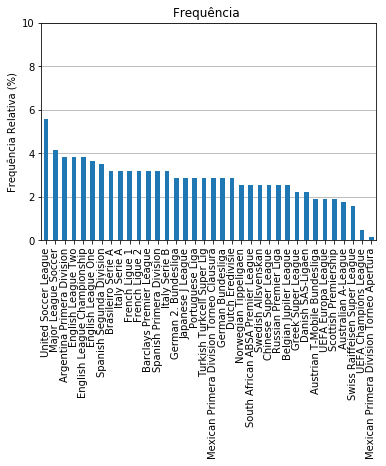

In [26]:
tab_freq_liga['Rel. (%)'].plot(kind='bar',zorder=2)
plt.grid(axis='y', zorder=1)
plt.rcParams['figure.figsize'] = (15,10) 
plt.xticks(fontsize = 10, rotation=90)
plt.ylim(0,10)
plt.ylabel(r'Frequência Relativa (%)')
plt.title('Frequência ')

plt.plot()
plt.show()

Esse gráfico nos dá a frequência relativa (probabilidade) de algum clube da lista participar de alguma dessas ligas. 

$\textit{Gráficos Densidade de Kernel para Variáveis Contínuas:}$

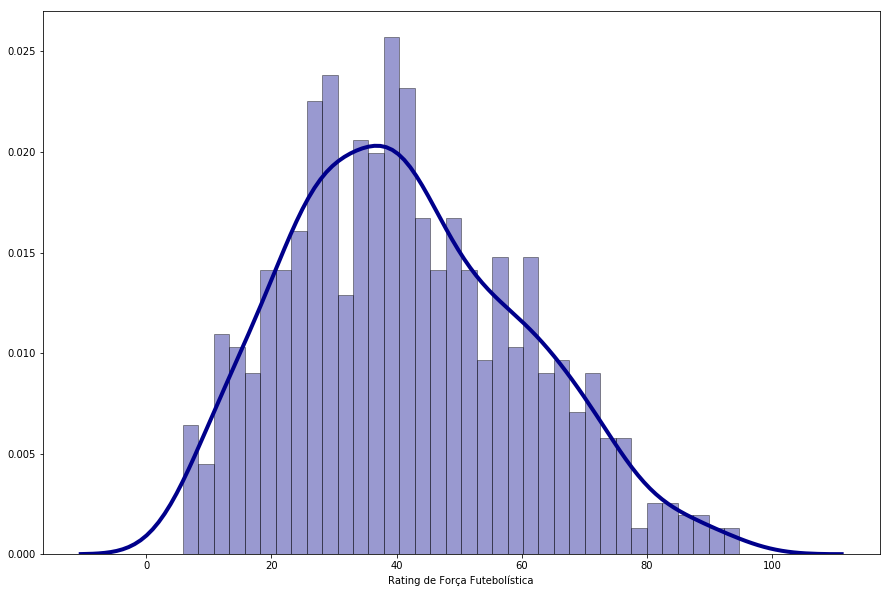

In [27]:
sns.distplot(dados['Rating de Força Futebolística'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot()
plt.show()

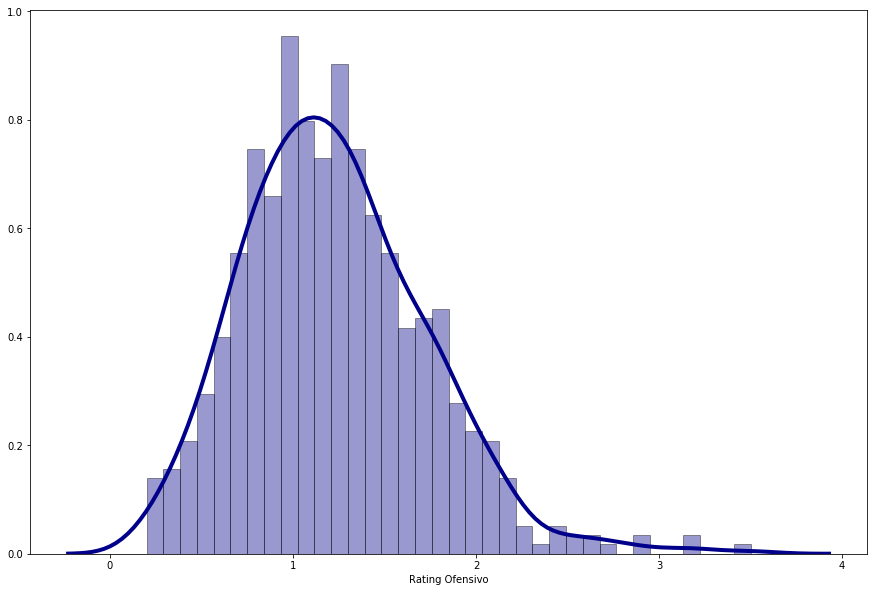

In [28]:
sns.distplot(dados['Rating Ofensivo'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot()
plt.show()

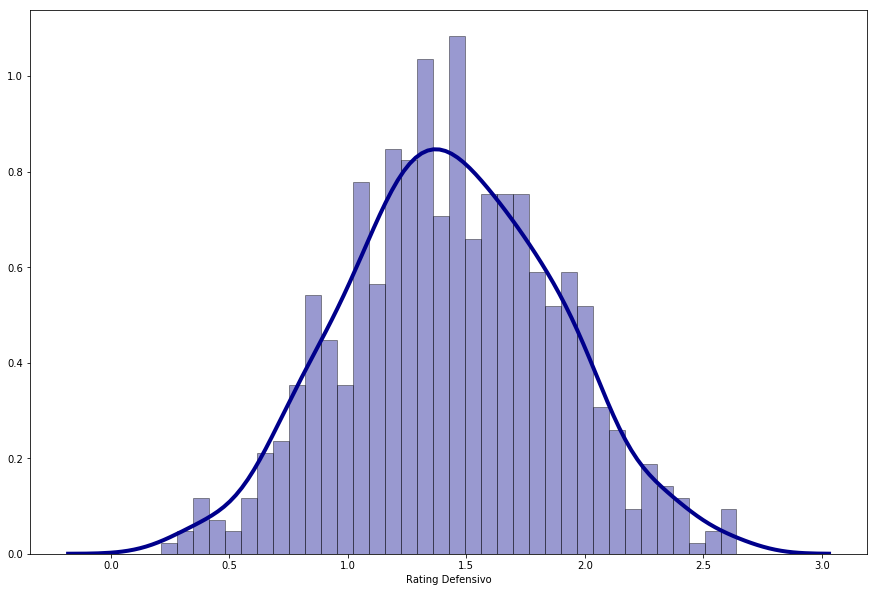

In [29]:
sns.distplot(dados['Rating Defensivo'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.plot()
plt.show()

Gráfico de densidade pela estimativa da densidade de Kernel de uma versão contínua e suave de um histograma estimado a partir dos dados.
Nesse método, uma curva contínua (o kernel) é desenhada em todos os pontos de dados individuais e todas essas curvas são adicionadas juntas para fazer uma única estimativa de densidade suave. O kernel mais usado é um gaussiano (que produz uma curva de sino gaussiano em cada ponto de dados). 
O eixo x é o valor da variável como em um histograma. O eixo y é a função de densidade de probabilidade para a estimativa da densidade do kernel.

$\textit{Gráficos de Distribuição Acumulativa para Variáveis Contínuas:}$

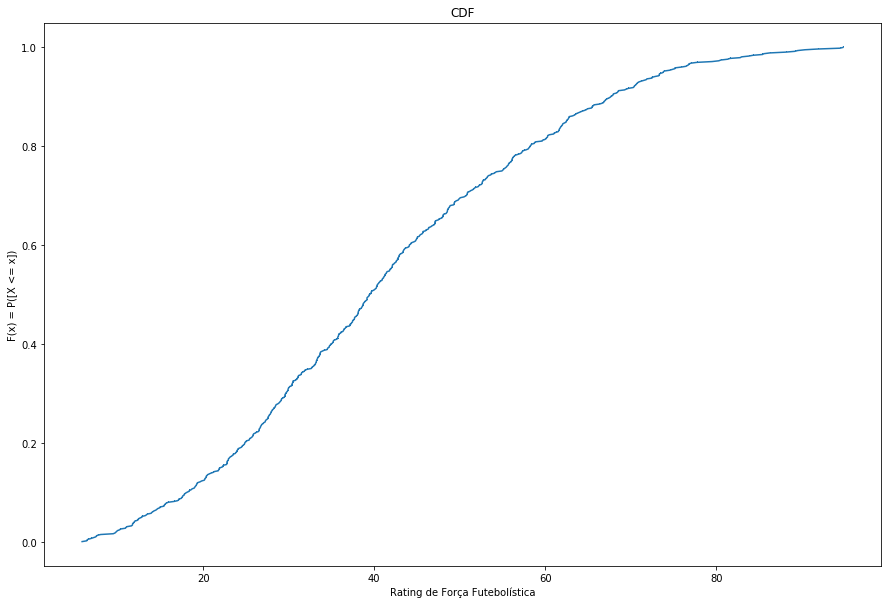

In [30]:
x = np.sort(dados['Rating de Força Futebolística']) 
func = sm.distributions.empirical_distribution.ECDF(x) 
y = func(x) 
plt.title('CDF')
plt.xlabel('Rating de Força Futebolística')
plt.ylabel('F(x) = P([X <= x])')
plt.plot(x, y, marker = ',')
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

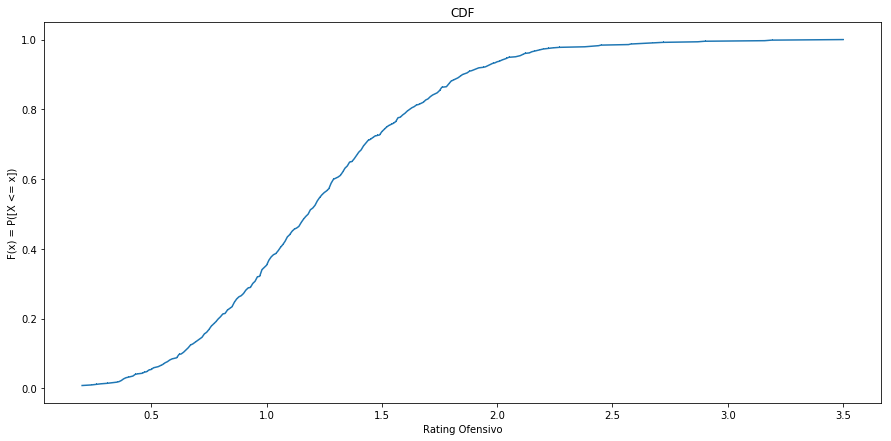

In [31]:
x = np.sort(dados['Rating Ofensivo']) 
func = sm.distributions.empirical_distribution.ECDF(x) 
y = func(x)
plt.title('CDF')
plt.xlabel('Rating Ofensivo')
plt.ylabel('F(x) = P([X <= x])')
plt.plot(x, y, marker = ',')
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

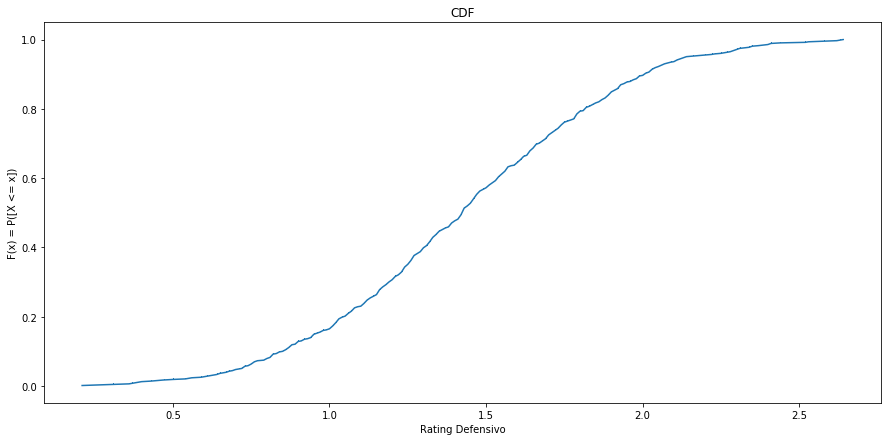

In [32]:
x = np.sort(dados['Rating Defensivo'])  
func = sm.distributions.empirical_distribution.ECDF(x) 
y = func(x) 
plt.title('CDF')
plt.xlabel('Rating Defensivo')
plt.ylabel('F(x) = P([X <= x])')
plt.plot(x, y, marker = ',')
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

$\textit{Gráficos de Distribuição de Densidade para Variáveis Contínuas:}$

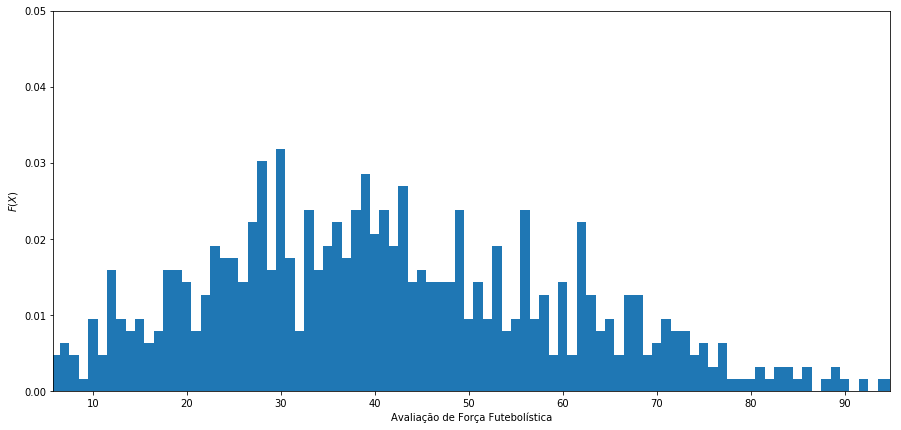

In [33]:
ax = dados['Rating de Força Futebolística'].plot(kind='hist', density=True, histtype='bar', rwidth=1,
xlim=(min(dados['Rating de Força Futebolística'])-0.05, max(dados['Rating de Força Futebolística'])+0.05), ylim=(0,0.05), 
 legend=False, bins=np.arange(len(dados['Rating de Força Futebolística']))-0.5)
ax.set_xlabel(r'Avaliação de Força Futebolística')
ax.set_ylabel(r'$F(X)$')
plt.rcParams['figure.figsize'] = (15,7) 


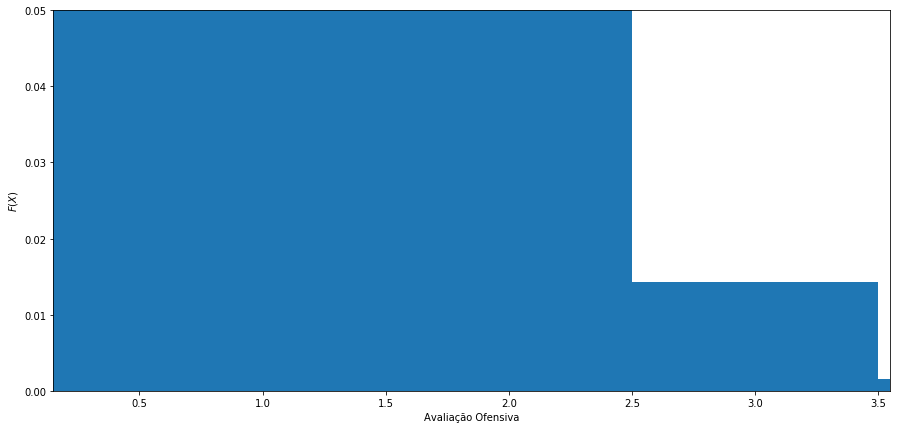

In [34]:
ax = dados['Rating Ofensivo'].plot(kind='hist', density=True, histtype='bar', rwidth=1,
                     xlim=(min(dados['Rating Ofensivo'])-0.05, max(dados['Rating Ofensivo'])+0.05), ylim=(0,0.05), 
                     legend=False, bins=np.arange(len(dados['Rating Ofensivo']))-0.5)
ax.set_xlabel(r'Avaliação Ofensiva')
ax.set_ylabel(r'$F(X)$')
plt.rcParams['figure.figsize'] = (15,7) 


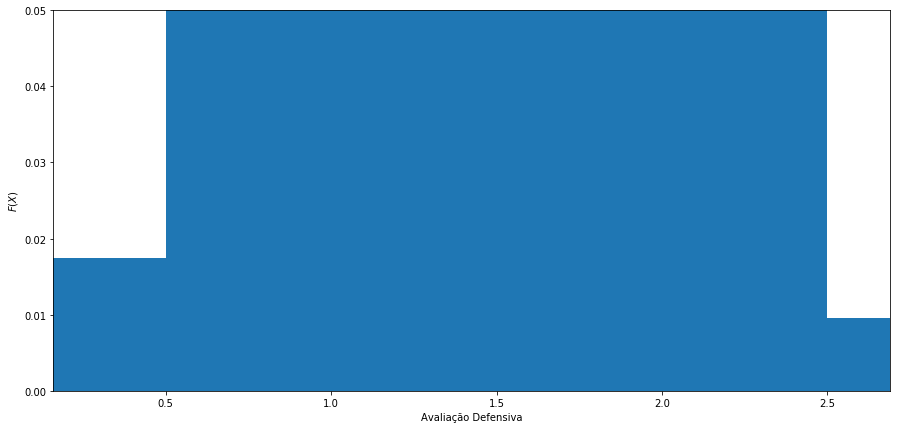

In [35]:
ax = dados['Rating Defensivo'].plot(kind='hist', density=True, histtype='bar', rwidth=1,
                     xlim=(min(dados['Rating Defensivo'])-0.05, max(dados['Rating Defensivo'])+0.05), ylim=(0,0.05), 
                     legend=False, bins=np.arange(len(dados['Rating Defensivo']))-0.5)
ax.set_xlabel(r'Avaliação Defensiva')
ax.set_ylabel(r'$F(X)$')
plt.rcParams['figure.figsize'] = (15,7) 

### 6. Teste Kolmogorov-Smirnov
Aplica-se o teste Kolmogorov-Smirnov com o objetivo de comprovação da hipótese nula ($H_0$), que afirma a normalidade da distribuição amostral. Para tal, procuram-se p-values superiores a 0.8, conforme o especificado. Nesse contexto, duas amostras são selecionadas.

In [36]:
x1 = dados['Rating Ofensivo']
y1 = dados['Rating Defensivo']
z1 = dados['Rating de Força Futebolística']
x1.to_numpy()
y1.to_numpy()
z1.to_numpy()

array([94.8 , 94.44, 91.91, 90.33, 89.49, 89.15, 88.09, 86.23, 85.54,
       85.38, 84.28, 83.78, 82.94, 82.78, 81.58, 81.31, 80.53, 80.28,
       79.48, 77.72, 77.04, 76.77, 76.75, 76.59, 76.44, 75.89, 75.15,
       75.14, 75.14, 74.53, 73.91, 73.8 , 73.73, 73.46, 73.32, 73.31,
       73.27, 72.81, 72.48, 72.46, 71.87, 71.79, 71.79, 71.17, 70.91,
       70.78, 70.69, 70.62, 70.53, 70.41, 70.37, 70.27, 69.72, 69.46,
       69.26, 68.56, 68.49, 68.44, 68.31, 67.97, 67.91, 67.88, 67.69,
       67.62, 67.48, 67.27, 67.12, 67.02, 66.94, 66.83, 66.82, 66.62,
       66.32, 65.68, 65.63, 65.48, 65.45, 65.4 , 64.92, 64.81, 64.59,
       64.31, 64.05, 63.87, 63.66, 63.52, 63.4 , 63.19, 62.78, 62.75,
       62.72, 62.68, 62.55, 62.51, 62.44, 62.42, 62.24, 62.05, 62.05,
       61.97, 61.88, 61.79, 61.76, 61.68, 61.63, 61.63, 61.55, 61.51,
       61.23, 61.02, 60.98, 60.47, 60.28, 60.28, 60.25, 60.13, 60.08,
       59.94, 59.67, 59.63, 58.85, 58.74, 58.71, 58.37, 58.34, 58.25,
       58.19, 58.14,

In [37]:
ks1 = scs.kstest(x1, 'norm')
ks2 = scs.kstest(y1, 'norm')
ks3 = scs.kstest(z1, 'norm')

print("Rating Ofensivo, \np-value=", ks1)
print("Rating Defensivo, \np-value=", ks2)
print("Rating de Força Futebolística, \np-value=", ks3)

Rating Ofensivo, 
p-value= KstestResult(statistic=0.6449307249729884, pvalue=1.6223156750141128e-255)
Rating Defensivo, 
p-value= KstestResult(statistic=0.7164305038835223, pvalue=0.0)
Rating de Força Futebolística, 
p-value= KstestResult(statistic=0.999999997542135, pvalue=0.0)


Os baixíssimos valores do p-value < 0.001 rejeitam a chance de constatação da Hipótese Nula ($H_0$), que afirma a normalidade da distribuição amostral.

É importante frisar que os valores p-value=0 não é uma verdade, mas uma aproximação. Pois sempre há uma chance de obter os resultados da Hipótese Nula ($H_0$), por menor ou improvável que seja a chance.
É provavel que a hipótese nula tenha sido rejeitada pelo tamanho da amostra.

Vamos tentar provar que há diferença entre os alvos da comparação estatística, confirmando a Hipótese Alternativa ($H_1$).

#### 6.1 Avaliação pelo Teste de Shapiro

In [38]:
s1 = scs.shapiro(x1)
s2 = scs.shapiro(y1)
s3 = scs.shapiro(z1)

print("Rating Ofensivo, \np-value=", s1)
print("Rating Defensivo, \np-value=", s2)
print("Rating de Força Futebolística, \np-value=", ks3)

Rating Ofensivo, 
p-value= (0.9749813079833984, 6.880295444489093e-09)
Rating Defensivo, 
p-value= (0.9978125095367432, 0.5953747630119324)
Rating de Força Futebolística, 
p-value= KstestResult(statistic=0.999999997542135, pvalue=0.0)


(0.9978125095367432, 0.5953747630119324)


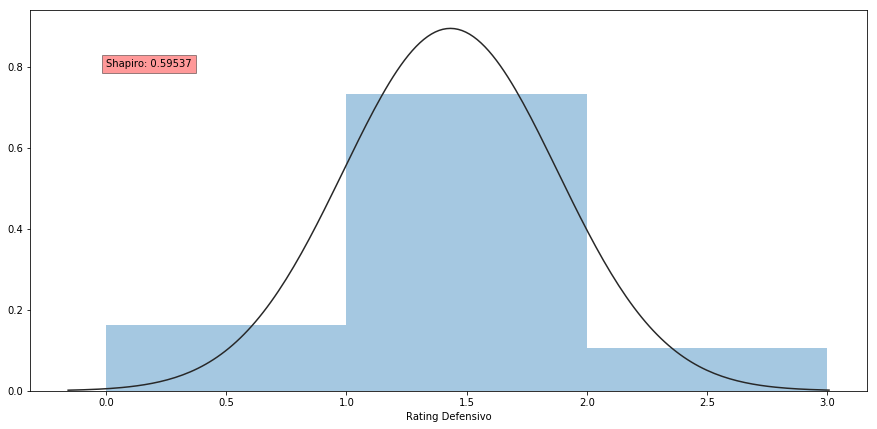

In [39]:
sns.distplot(y1, bins=range(0,4,1), fit=scs.norm, kde=False)
print(s2)

plt.text(0, 0.8, 'Shapiro: '+str(round(s2[1], 5) ), bbox=dict(facecolor='red', alpha=0.4), zorder=4 )
plt.show()

O teste de Shapiro é independente do tamanho da amostra.
Por este metódo a única mudança significativa analisando os resultados foram os dados de Rating Defensivo. Porém, o p-value continuou abaixo de 5%. Logo, rejeitamos a hipótese nula novamente.


### 7. Regressão e Predição

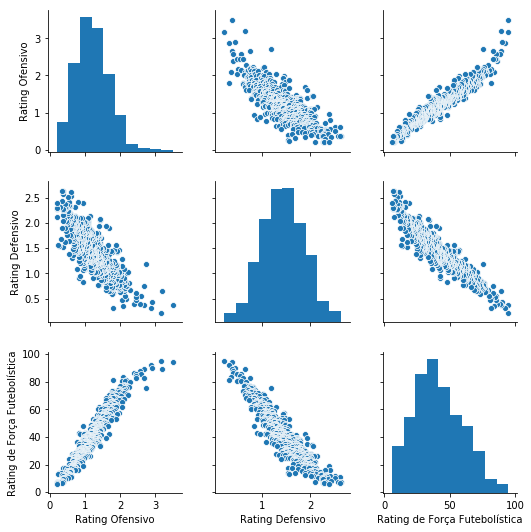

In [40]:
Y = dados[continua]
g=sns.pairplot(Y)


Gráfico matriz de dispersão, onde as diagonais nos mostram o a distribuição de uma única variável em formato de histograma. Enquanto as matrizes triangular inferior e superior mostram a relação entre duas variáveis. 

In [ ]:
corr = dados.corr()

In [ ]:
plt.gcf()
sns.heatmap(corr, linewidths=.5, annot=True)
lim_y = plt.ylim()
plt.ylim(lim_y[0]+0.5, lim_y[1]-0.5)
plt.yticks(rotation=0,va="center")
plt.show()

In [ ]:
cor = Y.corr()
cor

Como observado, a correlação para Rating Ofensivo e Defensivo com o Rating de Força Futebolística é muito forte. Pois os melhores times fazem muito gols e levam poucos gols. Logo, nos melhores times, o Rating Ofensivo  é alto e por isso correlação positiva e o Rating Defensivo é baixo e por isso sua correlação negativa.

Podemos perceber que a correlação entre Rating Ofensivo(Gols feitos) x Rating Defensivo(Gols levados) é forte. Pois  também é possível existirem times que fazem muitos gols e levam muitos gols.

### 7.1 Qualificando a Regressão por Mínimos Quadrados

Calculamos a regressão de mínimos quadrados para dois conjuntos de medidas.

A função scipy.stats.linregress calcula uma regressão de mínimos quadrados para dois conjuntos de medidas:
E retorna: a inclinação, interceptação, rvalue, pvalue, erro padrão da estimativa.

In [ ]:
z2 = z1.values

$\textit{Conjunto Rating Ofensivo x Rating Defensivo}$


In [ ]:
b0, b1, r, pvalue, stder  = scs.stats.linregress(x1,y1)
print('Parâmetros: b0 =', b0, 'b1 =', b1)
print('Valor para o teste de hipótese que a inclinação é nula', pvalue)
print("Coeficiente de Determininação:", r**2)
print("Desvio padrão da estimativa:", stder)

Coeficiente de Determinação não indica uma boa qualidade de regressão, porém o desvio padrão dos erros indicam uma baixa variabilidade. Pelo teste de hipótese não podemos considerar a inclinação nula.

In [ ]:
plt.scatter(x1, y1)
b0, b1, r, pvalue, stder  = scs.stats.linregress(x1,y1)
x_1 = np.linspace(x1.min(), y1.max(), 100)
plt.plot(x_1, b0*x_1+b1, 'red')
plt.text(3,2.8, r'$Y = \alpha X + \beta$' +'\nY = '+str(round(b0, 3))+'X+'+str(round(b1, 3)), bbox=dict(facecolor='red', alpha=0.4))
plt.title('Regressão Linear para Rating Ofensivo')
plt.show()

$\textit{Conjunto Rating Defensivo x Rating Ofensivo}$


In [ ]:
b0, b1, r, pvalue, stder = scs.stats.linregress(y1,x1)
print('Parâmetros: b0 =', b0, 'b1 =', b1)
print('Valor para o teste de hipótese que a inclinação é nula', pvalue)
print("Coeficiente de Determininação:", r**2)
print("Desvio padrão da estimativa:", stder)

Coeficiente de Determinação não indica uma boa qualidade de regressão, porém o desvio padrão dos erros indicam uma baixa variabilidade. Pelo teste de hipótese não podemos considerar a inclinação nula.

In [ ]:
plt.scatter(y1, x1)
b0, b1, r, pvalue, stder  = scs.stats.linregress(y1,x1)
x_1 = np.linspace(y1.min(), x1.max(), 100)
plt.plot(x_1, b0*x_1+b1, 'red')
plt.text(3,2.8, r'$Y = \alpha X + \beta$' +'\nY = '+str(round(b0, 3))+'X+'+str(round(b1, 3)), bbox=dict(facecolor='red', alpha=0.4))
plt.title('Regressão Linear para Rating Defensivo')
plt.show()

$\textit{Conjunto Rating Ofensivo x Rating de Força Futebolística}$


In [ ]:
b0, b1, r, pvalue, stder = scs.stats.linregress(x1,z2)
print('Parâmetros: b0 =', b0, 'b1 =', b1)
print('Valor para o teste de hipótese que a inclinação é nula', pvalue)
print("Coeficiente de Determininação:", r**2)
print("Desvio padrão da estimativa:", stder)

Coeficiente de Determinação indica uma boa qualidade de regressão, e o desvio padrão dos erros indicam uma baixa variabilidade. Pelo teste de hipótese não podemos considerar a inclinação nula.

$\textit{Conjunto Rating Defensivo x Rating de Força Futebolística}$


In [ ]:
b0, b1, r, pvalue, stder = scs.stats.linregress(y1,z2)
print('Parâmetros: b0 =', b0, 'b1 =', b1)
print('Valor para o teste de hipótese que a inclinação é nula', pvalue)
print("Coeficiente de Determininação:", r**2)
print("Desvio padrão da estimativa:", stder)

Coeficiente de Determinação  indica uma boa qualidade de regressão, e o desvio padrão dos erros indicam uma baixa variabilidade. Pelo teste de hipótese não podemos considerar a inclinação nula.

A partir dessa análise prêvia podemos fazer um estudo mais detalhado do conjunto Rating Ofensivo x Rating de Força Futebolística pois foi o que apresentou melhor coeficiente de determinação.


In [ ]:
xm = stats.mean(x1)
ym = stats.mean(z2)
xy = np.multiply(x1,z2)
sxy = sum(xy)
xx = np.multiply(x1,x1)
sxx = sum(xx)
n = len(x1)

b1 = (sxy-n*xm*ym)/(sxx-n*xm*xm)
b0 = ym-b1*xm

est=[]
for i in range(len(x1)):
    est.append(b0+(b1*x[i]))
print(est)

In [ ]:
sse=0
for i in range(len(x1)):
    sse+=(z2[i]-b0-b1*x1[i])*(z2[i]-b0-b1*x1[i])
sst=0
for i in range(len(y)):
    sst+=(z2[i]-ym)*(z2[i]-ym)
r=(sst-sse)/sst
print(r)

Confirmando o R da Função scipy.stats.linregress. Podemos concluir que a qualidade da regressão é alta.

In [ ]:
ey=[]
for i in range(len(z2)):
    ey.append(z2[i]-est[i])
print(ey)

In [ ]:
qme=sse/(n-2)
serro=np.sqrt(qme)
print('Desvio Padrão  dos erros:', serro)

In [ ]:
sb0 = serro * math.sqrt(1/n+(xm*xm/(sxx-(n*(xm*xm)))))
print('Desvio Padrão do parâmetro b0', sb0)

In [ ]:
sb1 = serro / math.sqrt(sxx-(n*(xm*xm)))
print('Desvio Padrão do parâmetro b1', sb1)

### 7.2 Testes Visual de Pressuposto




In [ ]:
plt.scatter(x1,z2)
plt.xlabel("Rating Ofensivo")
plt.ylabel("Rating de Força Futebólistica")
plt.title("Teste de Linearidade")
plt.show()

O teste de linearidade é bem válidado se pensarmos em uma reta ajustada aos dados.

In [ ]:
plt.scatter(ey,est)
plt.xlabel("Estimadores")
plt.ylabel("Erros")
plt.title("Teste de Independência dos Erros")
plt.rcParams['figure.figsize'] = (15,7) 
plt.show()

O erros aparentam seguir um padrão decrescente mostrando uma tendência visível, evidênciando uma dependência dos resíduos. Indicado que um modelo de regressão não linear sobre a amostra pode apresentar melhores resultados. 

In [ ]:
sm.qqplot(np.array(ey), scs.t, fit=True, line='45')
plt.title("Erros Normais")

plt.show()

Os erros estão seguindo uma distribuição normal. Então podemos predizer e estimar em nosso modelo. 

In [ ]:
mediaerros= np.mean(est)
print(mediaerros)
plt.scatter(ey,est)
plt.axhline(y=mediaerros, color='r', linestyle='-')
plt.xlabel("Estimadores")
plt.ylabel("Erros")
plt.title("Homocedastiticidade")
plt.show()


A distribuição dos dados em torno da média dos resíduos está com uma tendência visivel, temos indícios que a variância dos resíduos não são homogêneas existindo heterocedasticidade. Essa tendência é um bom índicio para uso de regressão não-linear.